# Summary
Classes = 2
<br /> Hidden Layers = 128
<br /> Batch Size = 32
<br /> Epochs = 4
<br /> Validation Split = 0.20
<br /> Dataset: BALANCED
<br /> URL: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data

# Libraries
If needed...

In [1]:
!pip install scikit-learn
!pip install tensorflow
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install seaborn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

# Dataset
Loading the dataset and creating a copy to be processed.


Credit Card Loaded Data :
------------------------------------
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.3

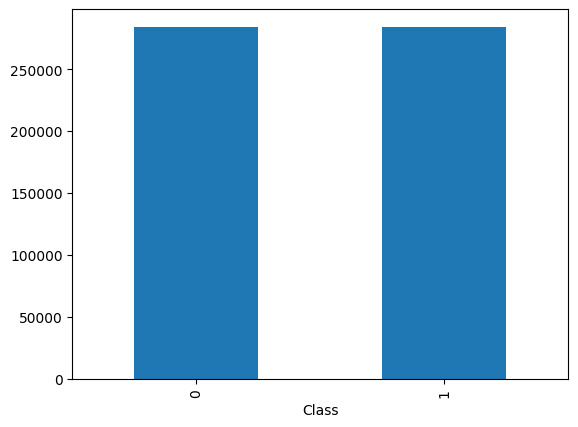

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

cc_data = pd.read_csv("../datasets/creditcard_2023.csv")

copied_df = cc_data.copy()

# Shows that the classifcation column is balanced
copied_df['Class'].value_counts().plot.bar()

print("\nCredit Card Loaded Data :\n------------------------------------")
print(copied_df.head())

# Data Handling/Preprocessing
### Checking for unformated data
Since there are no alphabet characters in the dataset, we can skip label encoding.
<br/>However, we will need to check if there are any missing values in it.

In [3]:
# The isnull() method will check if there are any null values in the dataframe.
copied_df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# Another check...Since, there are no True values listed, we can conclude that every cell is filled.

pd.isnull(copied_df)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568626,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568627,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568628,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Correlations with Heatmap

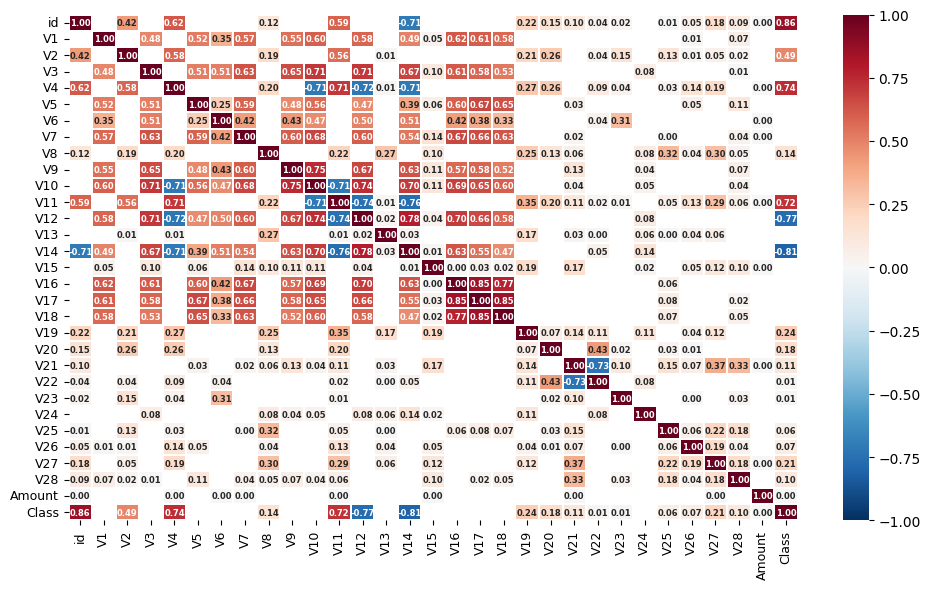

None

In [5]:
import matplotlib.pyplot as plt # Matplotlib for visualization tasks
import seaborn as sns # Seaborn for data visualization library based on matplotlib.

corr = copied_df.corr()

plt.figure(figsize=(10,6))

plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)

ax = sns.heatmap(corr[(corr >= 0/5) | (corr <= -0.7)],
            cmap='RdBu_r', vmax=1.0, vmin=-1.0, linewidths=.1, fmt="0.2f",
            xticklabels='auto', yticklabels='auto',
            annot=True, annot_kws={"size": 6, "weight": 'bold'}, square=False)

plt.tight_layout()

display(plt.show())

# Before Scaling
Firstly, the data set will need to be converted to a numpy array.
The features and target variable will need to be identified as well.

In [6]:
from sklearn import preprocessing
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# converts dataset into preferred data type of array
np_cc = copied_df.to_numpy()

# Feature Variables
X_data = np_cc[:,:30]

# Target Variable
Y_data = np_cc[:,30:31]

print("\nFeatures before scaling :\n------------------------------------")
print(X_data)
print("\nTarget Variable before scaling :\n------------------------------------")
print(Y_data)


Features before scaling :
------------------------------------
[[ 0.00000000e+00 -2.60647805e-01 -4.69648450e-01 ... -8.12301086e-02
  -1.51045486e-01  1.79821000e+04]
 [ 1.00000000e+00  9.85099734e-01 -3.56045093e-01 ... -2.48052059e-01
  -6.45119230e-02  6.53137000e+03]
 [ 2.00000000e+00 -2.60271613e-01 -9.49384607e-01 ... -3.00258035e-01
  -2.44718229e-01  2.51354000e+03]
 ...
 [ 5.68627000e+05 -3.11997393e-01 -4.09479480e-03 ... -4.87539751e-01
  -2.68741268e-01  2.35728500e+04]
 [ 5.68628000e+05  6.36870539e-01 -5.16969517e-01 ... -1.59269263e-01
  -7.62505739e-02  1.01608300e+04]
 [ 5.68629000e+05 -7.95144165e-01  4.33236084e-01 ... -1.57511260e+00
   7.22936496e-01  2.14939200e+04]]

Target Variable before scaling :
------------------------------------
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


# After Scaling
The data will then need to be fitted. As well as scale the numeric featrues and convert the feature variables into a one-hot-encoding array.

In [7]:
#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature variables
X_data = scaler.transform(X_data)

#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,2)

print("\nFeatures after scaling :\n------------------------------------")
print(X_data)
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y_data)


Features after scaling :
------------------------------------
[[-1.73204776 -0.2606478  -0.46964845 ... -0.08123011 -0.15104549
   0.85844694]
 [-1.73204167  0.98509973 -0.35604509 ... -0.24805206 -0.06451192
  -0.79636931]
 [-1.73203558 -0.26027161 -0.94938461 ... -0.30025804 -0.24471823
  -1.37701093]
 ...
 [ 1.73203558 -0.31199739 -0.00409479 ... -0.48753975 -0.26874127
   1.66640101]
 [ 1.73204167  0.63687054 -0.51696952 ... -0.15926926 -0.07625057
  -0.27185346]
 [ 1.73204776 -0.79514417  0.43323608 ... -1.5751126   0.7229365
   1.3659619 ]]

Target after one-hot-encoding :
------------------------------------
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# Splitting the training and test data

In [9]:
# stratify: This ensures that the distribution of labels will be the same in the 
#    training and test sets as they are in the original dataset
# random_state: random_state is a parameter in train_test_split that controls the 
#    random number generator used to shuffle the data before splitting it

#Split training and test data
X_train, X_test, Y_train, Y_test = train_test_split( X_data, Y_data, test_size=0.10, stratify=Y_data, random_state=2)


print("\nX_test Dimensions:\n------------------------------------")
print(X_test)

print("\nY_test Dimensions:\n------------------------------------")
print(Y_test)

print("\nTrain Test Dimensions:\n------------------------------------")
print("X_train Shape: " + str(X_train.shape), 
      "\nY_train Shape: " + str(Y_train.shape), 
      "\nX_test shape: " + str(X_test.shape), 
      "\nY_test shape: " + str(Y_test.shape))


X_test Dimensions:
------------------------------------
[[ 5.84775418e-01 -2.21434117e+00  2.59411363e+00 ...  1.98496314e+00
   1.00383746e+00 -1.20264054e+00]
 [-1.01399432e+00 -1.28585680e+00 -4.97671109e+00 ... -2.98867905e-01
  -3.60349287e+00 -1.07998962e+00]
 [-6.18068272e-01  1.63078106e+00 -4.92245832e-01 ... -2.88288825e-01
  -2.11427871e-01  2.90045846e-01]
 ...
 [-3.50708077e-01  1.47544133e+00 -7.47650772e-01 ... -2.10072187e-01
  -1.47966520e-01 -1.05314140e+00]
 [ 7.90667197e-01 -1.73418330e+00  1.49744601e+00 ... -2.11570285e+00
  -1.82823864e+00 -8.36530369e-01]
 [-1.41384362e+00  1.03117881e+00 -7.21247573e-01 ... -2.04790755e-01
   1.08540696e-03 -1.05173526e+00]]

Y_test Dimensions:
------------------------------------
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]

Train Test Dimensions:
------------------------------------
X_train Shape: (511767, 30) 
Y_train Shape: (511767, 2) 
X_test shape: (56863, 30) 
Y_test shape: (56863, 2)


# Model Architecture

In [10]:
from tensorflow import keras

# Shows the progress bar
VERBOSE = 1

#HYPER PARAMETERS
NB_CLASSES = 2
N_HIDDEN = 128

model = tf.keras.models.Sequential()

# Shape[0] refers the samples
# Shape[1] refers to the features
# input_shape=(X_train.shape[1],),  WAS PREVIOUSLY USED IN HIDDEN-LAYER-1

model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(X_train.shape[1],), #Since there are 30 features, we will use all of them as the input
                             name='Hidden-Layer-1',
                             activation='relu')) # Rectified Linear Unit (ReLU) 0 if x<0; otherwise

model.add(keras.layers.Dense(N_HIDDEN,
                             name='Hidden-Layer-2',
                             activation='relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax')) # Vector of probabilities, with sum=1

model.compile(loss='categorical_crossentropy',
                    metrics=['Accuracy', 'AUC', 'F1Score', 'Precision', 'Recall'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               3968      
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 2)                 258       
                                                                 
Total params: 20738 (81.01 KB)
Trainable params: 20738 (81.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training


Training Progress:
------------------------------------
Epoch 1/4
12795/12795 [==============================] - 8s 600us/step - loss: 0.0068 - Accuracy: 0.9988 - auc: 0.9997 - f1_score: 0.9988 - precision: 0.9988 - recall: 0.9988 - val_loss: 0.0065 - val_Accuracy: 0.9995 - val_auc: 0.9997 - val_f1_score: 0.9995 - val_precision: 0.9995 - val_recall: 0.9995
Epoch 2/4
12795/12795 [==============================] - 8s 593us/step - loss: 0.0048 - Accuracy: 0.9995 - auc: 0.9997 - f1_score: 0.9995 - precision: 0.9995 - recall: 0.9995 - val_loss: 0.0055 - val_Accuracy: 0.9995 - val_auc: 0.9997 - val_f1_score: 0.9995 - val_precision: 0.9995 - val_recall: 0.9995
Epoch 3/4
12795/12795 [==============================] - 8s 594us/step - loss: 0.0054 - Accuracy: 0.9995 - auc: 0.9997 - f1_score: 0.9995 - precision: 0.9995 - recall: 0.9995 - val_loss: 0.0116 - val_Accuracy: 0.9991 - val_auc: 0.9994 - val_f1_score: 0.9991 - val_precision: 0.9991 - val_recall: 0.9991
Epoch 4/4
12795/12795 [===========

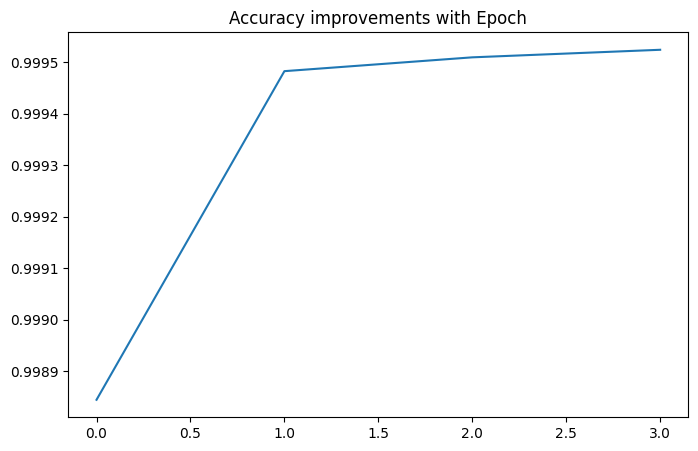


Evaluation against Test Dataset :
------------------------------------
1777/1777 [==============================] - 1s 404us/step - loss: 0.0061 - Accuracy: 0.9995 - auc: 0.9997 - f1_score: 0.9995 - precision: 0.9995 - recall: 0.9995


[0.006092368625104427,
 0.999472439289093,
 0.9996652007102966,
 array([0.99947244, 0.99947244], dtype=float32),
 0.999472439289093,
 0.999472439289093]

In [11]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
#2^n are appropriate sizes for batch. Standard size is 32...
BATCH_SIZE=32
#Set number of epochs
EPOCHS=4
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
test_history = model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(test_history.history)["Accuracy"].plot(figsize=(8,5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)